# Bajas de empleados en una Organización - ¿Por qué abandonan los empleados?

*"Los gerentes tienden a culpar de sus problemas de rotación a todo lo que está bajo el sol, mientras que ignoran el quid de la cuestión: la gente no deja el trabajo, deja a los gerentes"*.
Travis BradBerry

## Nota

Este kernel está basado en el trabajo realizado por **[Janio Martínez Bachmann](https://www.kaggle.com/janiobachmann)**: [Attrition in an Organization || Why Workers Quit?](https://www.kaggle.com/janiobachmann/attrition-in-an-organization-why-workers-quit/notebook). Su kernel está desarrollado para R y en este notebook lo desarrollaré sobre Python.

## Introducción

Los objetivos de este notebook son varios:

+ El primero de ellos es seguir adquiriendo y consolidando conocimientos de **Python**, aplicado al entorno de Data Science.

+ **Análisis exploratorio de los datos (EDA)**. Antes de elaborar cualquier modelo predictivo conviene profundizar en el análisis de los datos, lo que nos permitirá proponer mejores hipótesis, obtener mejores conclusiones, etc.

+ **Recomendaciones**. Tras el análisis de los datos estaremos en una mejor disposición para proporcionar recomendaciones a la organización que le permita comprender qué podrían hacer mejor para evitar el efecto negativo detrás de las bajas de empleados.

+ **Modelado**. Por último, implementar un modelo predictivo para determinar si un empleado va a renunciar o no.

El desgaste o abandono se definiría como la tasa de rotación de los empleados dentro de una organización. Esta puede puede producirse por múltiples causas:

+ Empleados que buscan mejores oportunidades.
+ Un ambiente de trabajo negativo.
+ Mala gestión
+ Enfermedad de un empleado (o incluso la muerte)
+ Horas de trabajo excesivas

## Dataset

Usaremos el dataset [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). Se trata de un dataset ficticio creado por data scientists de IBM con el objetivo de descubrir los factores que conducen al desgaste o abandono de los empleados de una organizacion.

## Carga del dataset

In [1]:
# Importamos las librerías esenciales
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("./data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Resumen de nuestros datos

***Pregunta 1***: ¿Cuántas variables y observaciones tenemos en nuestro dataset?

In [3]:
df.shape

(1470, 35)

*Respuesta 1*: 1.470 observaciones (filas) y 35 variables (columnas)

***Pregunta 2***: ¿Hay datos faltantes en nuestro dataset?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

*Respuesta 2:* Afortunadamente no existen ninguna dato nulo o vacío. Todas las observaciones tienen todas las variables cumplimentadas. Otra forma de ver si tenemos datos faltantes es usando la librería **`missingno`** como se muestra a continuación:

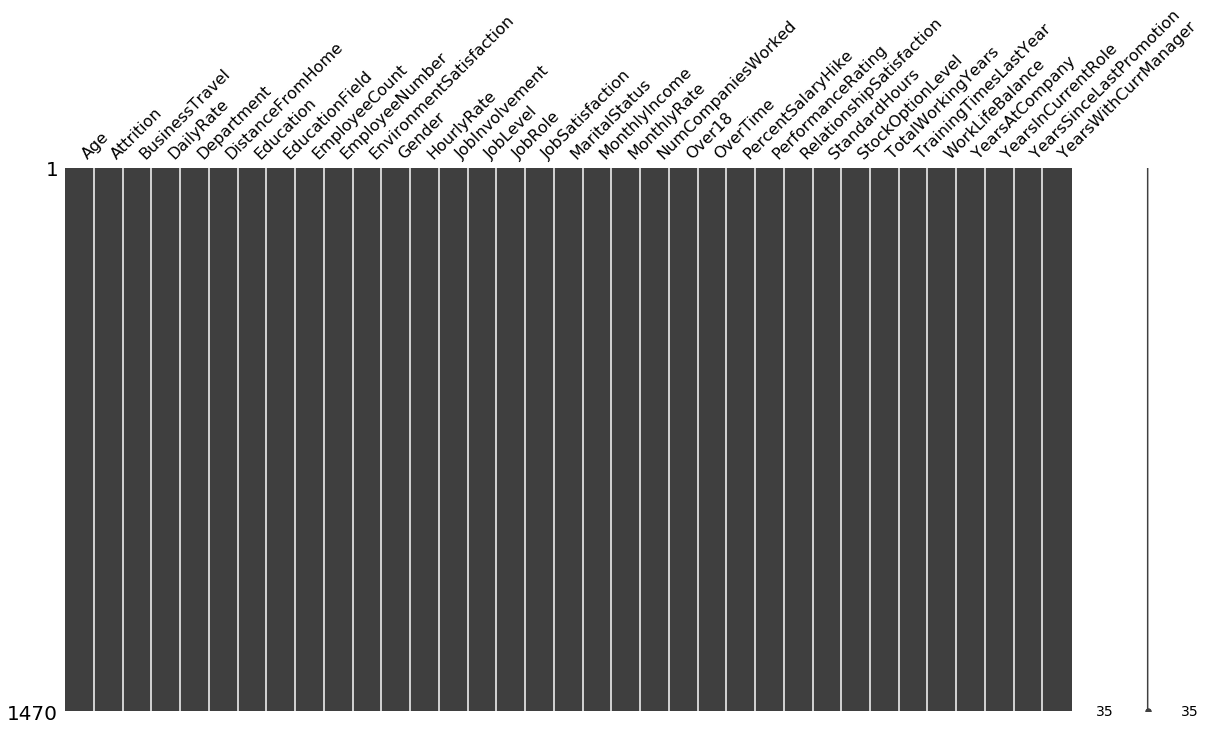

In [5]:
missingno.matrix(df, figsize = (20,10));

Este gráfico nos indica que todas las variables están completamente valoradas.

***Pregunta 3***: ¿Qué tipos de datos nos encontramos en este dataset?

*Respuesta 3*: Como vemos en la relación de columnas obtenida anteriormente, sólo tenemos dos tipos de datos: enteros y object (string).

***Pregunta 4***: En nuestro dataset ¿Cuál es nuestro target?

*Respuesta 4*: La variable target de nuestro dataset es `Attrition`. Dicha variable nos indica si el empleado ha causado baja (Yes/No).

***Distribución de nuestros datos***: ¿Es sesgada a la derecha, sesgada a la izquierda o simétrica? Esto podría ser útil, especialmente si estamos implementando cualquier tipo de análisis estadístico o incluso para el modelado.

***Significado de nuestros datos***: ¿Qué significan nuestros datos? La mayoría de las características en este conjunto de datos son variables ordinales que son similares a las variables categóricas, sin embargo, el orden de esas variables es importante. Muchas de las variables en este conjunto de datos tienen un rango de 1-4 o 1-5, cuanto más baja sea la variable ordinal, peor es en este caso. Por ejemplo, Job Satisfaction 1 = "Low" mientras que 4 = "Very High".

***Pregunta 5***: ¿Cómo de equilibrado es nuestro dataset respecto a la variable target?

In [6]:
df.groupby("Attrition").size()

Attrition
No     1233
Yes     237
dtype: int64

In [7]:
# df["Attrition"].value_counts().plot(kind='bar', title="Bajas de empleados (cantidad)", rot=0);

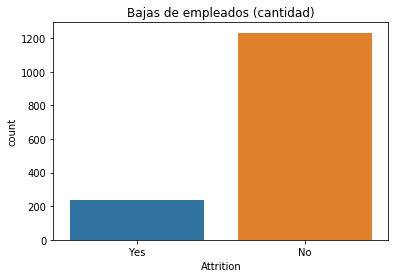

In [8]:
sns.countplot(x='Attrition', data=df);
plt.title("Bajas de empleados (cantidad)");

*Respuesta 5*: es un dataset desequilibrado. 1.233 (84% de los casos) de los empleados no abandonaron la organización, mientras que 237 (16% de los casos) dejaron la organización, por lo que nuestro conjunto de datos se considera ***desequilibrado***.

## Análisis de género:
En esta sección, trataremos de ver si hay discrepancias entre hombres y mujeres en la organización. Además, analizaremos otra información básica como la edad, el nivel de satisfacción laboral y el salario promedio por género.

### Edad por género
**¿Cuál es la distribución por edades entre hombres y mujeres?**

In [9]:
df_group = df[["Gender", "Age"]].groupby("Gender")
df_group.mean()

,Age
Gender,
Female,37.329932
Male,36.653061


*Respuesta*: Comprobamos que la edad promedio de las mujeres es de 37.33 y para los hombres es de 36.65.

Vamos a ver cómo se visualiza la distribución de edades.

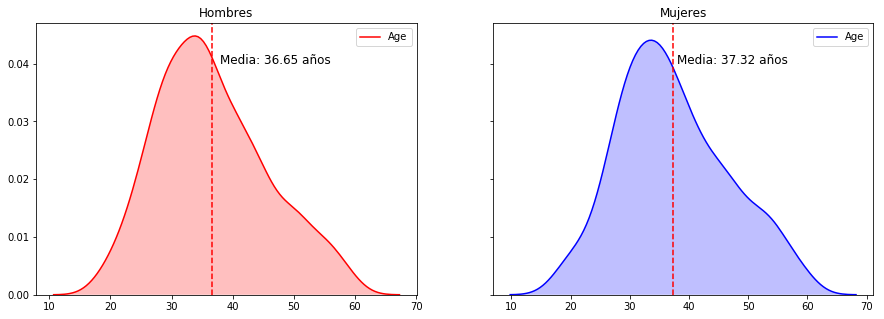

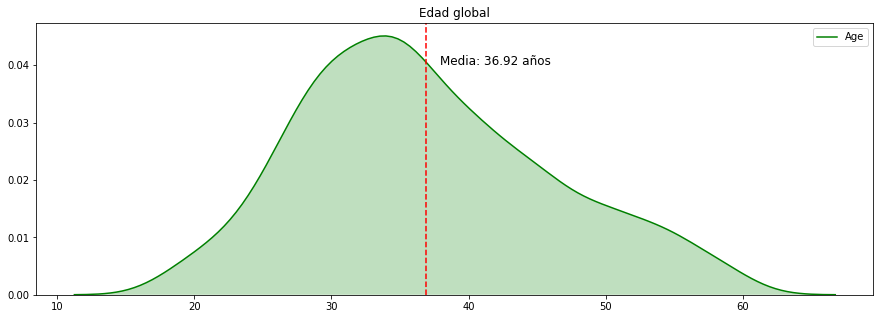

In [10]:
figure, axs = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.kdeplot(df[df["Gender"] == "Male"]['Age'], shade=True, color="r", ax=axs[0])
sns.kdeplot(df[df["Gender"] == "Female"]['Age'], shade=True, color="b", ax=axs[1])
axs[0].title.set_text('Hombres')
axs[1].title.set_text('Mujeres')
# Dibujamos una línea vertical en cada gráfico
# identificando la media de edad de cada uno de los grupos
axs[0].axvline(x=36.65, color="r", linestyle="--")
axs[1].axvline(x=37.32, color="r", linestyle="--")
# Dibujamos la leyenda de la media
axs[0].text(38, 0.04, u'Media: 36.65 años', fontsize = 12)
axs[1].text(38, 0.04, u'Media: 37.32 años', fontsize = 12);

# Dibujamos la gráfica global
media_edad = round(df["Age"].mean(), 2)
figure, axs = plt.subplots(nrows=1, sharey=True, figsize=(15,5))
sns.kdeplot(df['Age'], shade=True, color="g")
plt.title('Edad global')
plt.axvline(x=media_edad, color="r", linestyle="--")
plt.text(media_edad + 1, 0.04, 'Media: '+ str(media_edad) + ' años', fontsize = 12);

Ambas distribuciones (hombre y mujeres) son muy similares.

### Distribución de la satisfacción en el trabajo

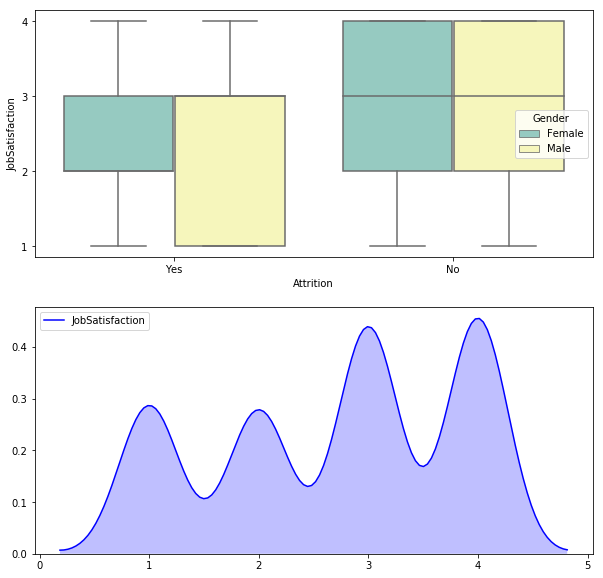

In [11]:
figure, axs = plt.subplots(nrows=2, figsize=(10,10))
axs[0].set_yticks(df["JobSatisfaction"].unique())  # Establecemos los valores del eje "y" que queremos (JobSatisfaction es categórica)
sns.boxplot(x="Attrition", y="JobSatisfaction", hue="Gender", data=df, palette="Set3", ax=axs[0])
sns.kdeplot(df["JobSatisfaction"], shade=True, color="b", ax=axs[1]);

Vemos que para las personas que no abandonaron la organización, los niveles de satisfacción laboral son prácticamente los mismos entre hombre y mujeres. Sin embargo, para las personas que abandonaron la organización, las mujeres tenían un nivel de satisfacción más bajo en comparación con los hombres.

### Ingresos mensuales por género

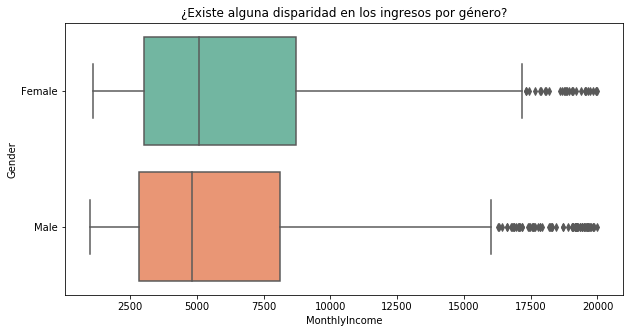

In [12]:
figure, axs = plt.subplots(figsize=(10,5))
sns.boxplot(x="MonthlyIncome", y="Gender", data=df, palette="Set2", ax=axs)
plt.title("¿Existe alguna disparidad en los ingresos por género?");

### Media de ingresos y presencia por departamento

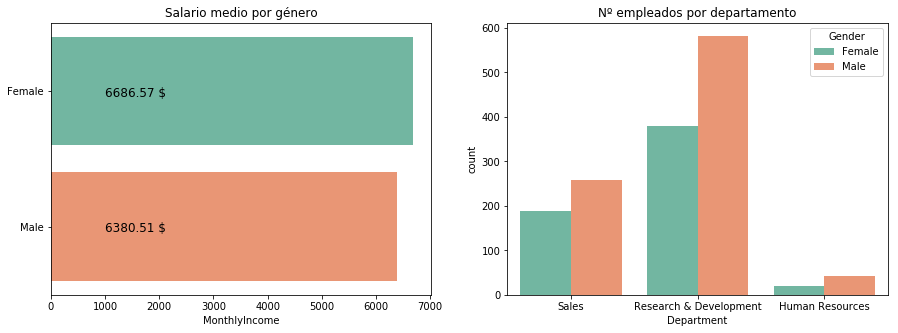

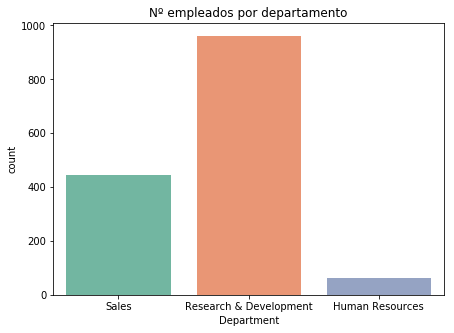

In [13]:
figure, axs = plt.subplots(ncols=2, figsize=(15,5))

# Salario medio por género
df_gender_income = df[["Gender", "MonthlyIncome"]].groupby("Gender").mean()
sns.barplot(x=df_gender_income["MonthlyIncome"], y=df_gender_income.index.values, orient="h", palette="Set2", ax=axs[0])
axs[0].title.set_text('Salario medio por género')
avg_male = round(df_gender_income["MonthlyIncome"][0],2)
avg_female = round(df_gender_income["MonthlyIncome"][1],2)
axs[0].text(1000, 0.04, str(avg_male) + " $", fontsize = 12)
axs[0].text(1000, 1.04, str(avg_female) + " $", fontsize = 12);

# Nº de empleados por departamento (por género)
sns.countplot(x='Department', hue="Gender", data=df, palette="Set2", ax=axs[1])
axs[1].title.set_text('Nº empleados por departamento')

# Nº de empleados por departamento
figure, axs = plt.subplots(figsize=(7,5))
sns.countplot(x='Department', data=df, palette="Set2", ax=axs);
plt.title('Nº empleados por departamento');

Los **salarios medios** para ambos sexos son prácticamente los mismos, teniendo los hombres un promedio de 6380.51 y las mujeres 6686.57. Respecto a los **departamentos** comprobamos que hay un mayor número de hombres en los tres departamentos.

## Análisis por Generación y Educación

Es bien sabido que cada tipo de generación tiene sus particularidades, así que podría ser interesante explorar este atributo en el dataset. Nos haremos preguntas del tipo ¿Cuál es el promedio de empresas que trabajaron anteriormente por cada generación? El objetivo es verificar si es cierto que las generaciones más mayores permanecen más tiempo en una empresa.

En primer lugar vamos a crearnon una variable categórica, denominada `Generation` en función de la edad del empleado:

In [14]:
conditions = [df["Age"] < 38, (df["Age"] >= 38) & (df["Age"] < 54), (df["Age"] >= 54) & (df["Age"] < 73)]
choices = ["Millenials", "Generation X", "Boomers"]
df["Generation"] = np.select(conditions, choices, default="Silent")

Vamos a comprobar cómo se distribuyen

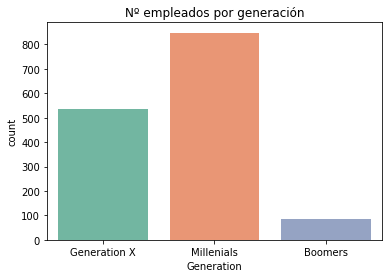

In [15]:
# Nº de empleados por generación
sns.countplot(x='Generation', data=df, palette="Set2");
plt.title('Nº empleados por generación');